# Use OSMnx to plot street network over place shape (Sokak ağını yer şekli üzerine çizmek için OSMnx'i kullanın)

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox

%matplotlib inline
ox.__version__

'1.3.0'

In [3]:
# get the place boundaries (# yer sınırlarını al)
place = "Portland, Maine"
gdf = ox.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place(place, network_type="drive", retain_all=True)

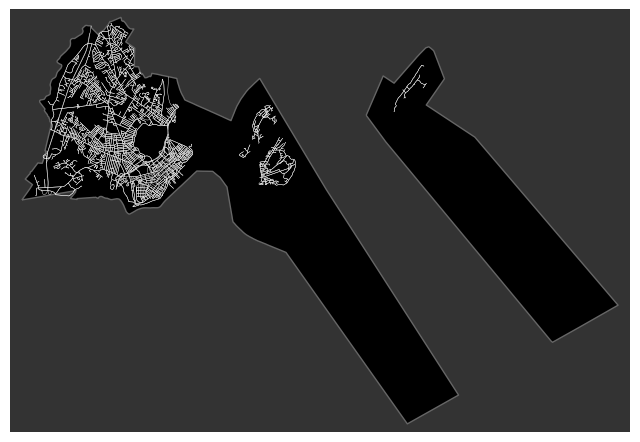

In [4]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape(s) (bu matplotlib eksenine yer şekil(ler)ini ekleyin)
gdf.plot(ax=ax, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents (isteğe bağlı olarak eksen uzantılarını ayarlayın)
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [5]:
islands = ox.geometries_from_place(place, tags={"place": ["island", "islet"]})
islands.shape

(27, 21)